# Data Mining (KEN4113) #
## Lab 4: Clustering ##

Konstantin Sandfort
i6255681

In [1]:
# Imports
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN

## Assignment 1

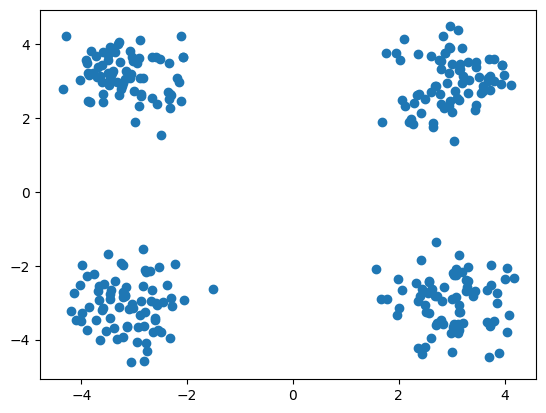

In [2]:
# (a) Data Generation

centers = [[-3, -3], [3, -3], [-3, 3], [3, 3]]
X, y = make_blobs(n_samples=300, centers=centers, cluster_std=0.6, random_state=None)
plt.scatter(X[:, 0], X[:, 1])

In [3]:
def exec_KMeans(data_X, data_y, random_state_):
    fig, axs = plt.subplots(2, 5, figsize=(15, 8))
    y_kmeans_list = []
    scores = []

    for i in range(10):
        # Define k
        k = i+1
        # Fit model
        clusters = KMeans(n_clusters=k, random_state=random_state_, n_init="auto").fit(data_X)
        y_kmeans = clusters.predict(X)
        y_kmeans_list.append(y_kmeans)
        # Retrieve scores (SSE)
        scores.append(clusters.score(X))
        # Retrieve cluster centers
        cntr = clusters.cluster_centers_
        # Create subplots
        axs[int(i / 5), i % 5].scatter(X[:, 0], X[:, 1], c=y_kmeans, s=5, cmap='magma')
        axs[int(i / 5), i % 5].scatter(cntr[:, 0], cntr[:, 1], c='black', s=80, alpha=0.8)
        axs[int(i / 5), i % 5].set_title(f'{k} K-Means')
    plt.show()
    
    # Plot scores
    # Create x labels for barplot
    x_labels = []
    for i in range(10):
        x_labels.append(str(i + 1))
    
    plt.figure()
    plt.bar(x_labels, np.abs(scores))
    plt.title('Sum of Square Errors for Different K-Means')
    plt.xlabel('K-Means')
    plt.ylabel('SSE')
    
    # Print contingency matrices
    for i in range(10):
        print(f'Contingency Matrix for k = {i+1}')
        print(contingency_matrix(data_y, y_kmeans_list[i]))
        print('---')

C:\Users\K-San\PycharmProjects\data_mining_course\venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\K-San\PycharmProjects\data_mining_course\venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Program Files\Python39\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Program Files\Python39\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Program Files\Python39\lib\subprocess.py", line 1420, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(e

Contingency Matrix for k = 1
[[75]
 [75]
 [75]
 [75]]
---
Contingency Matrix for k = 2
[[75  0]
 [ 0 75]
 [75  0]
 [ 0 75]]
---
Contingency Matrix for k = 3
[[75  0  0]
 [75  0  0]
 [ 0 75  0]
 [ 0  0 75]]
---
Contingency Matrix for k = 4
[[75  0  0  0]
 [ 0  0 75  0]
 [ 0  0  0 75]
 [ 0 75  0  0]]
---
Contingency Matrix for k = 5
[[35  0  0  0 40]
 [ 0  0  0 75  0]
 [ 0  0 75  0  0]
 [ 0 75  0  0  0]]
---
Contingency Matrix for k = 6
[[36  0  0  0  0 39]
 [ 0  0  0 75  0  0]
 [ 0  0 25  0 50  0]
 [ 0 75  0  0  0  0]]
---
Contingency Matrix for k = 7
[[75  0  0  0  0  0  0]
 [ 0  0  0 48  0 27  0]
 [ 0  0 75  0  0  0  0]
 [ 0 30  0  0 20  0 25]]
---
Contingency Matrix for k = 8
[[35  0  0  0  0 40  0  0]
 [ 0  0  0 30  0  0 45  0]
 [ 0  0 49  0  0  0  0 26]
 [ 0 28  0  0 47  0  0  0]]
---
Contingency Matrix for k = 9
[[ 0  0  0 75  0  0  0  0  0]
 [ 0 25  0  0  0 23 27  0  0]
 [30  0  0  0 45  0  0  0  0]
 [ 0  0 19  0  0  0  0 29 27]]
---
Contingency Matrix for k = 10
[[ 0  0 37  0  0

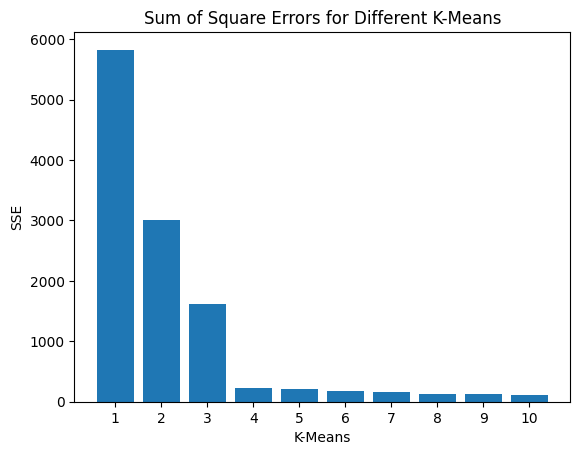

In [4]:
# (b), (c)
exec_KMeans(X, y, None)

Contingency Matrix for k = 1
[[75]
 [75]
 [75]
 [75]]
---
Contingency Matrix for k = 2
[[75  0]
 [75  0]
 [ 0 75]
 [ 0 75]]
---
Contingency Matrix for k = 3
[[ 0  0 75]
 [ 0  0 75]
 [75  0  0]
 [ 0 75  0]]
---
Contingency Matrix for k = 4
[[ 0 75  0  0]
 [ 0  0 75  0]
 [ 0  0  0 75]
 [75  0  0  0]]
---
Contingency Matrix for k = 5
[[ 0 46  0  0 29]
 [ 0  0  0 75  0]
 [ 0  0 75  0  0]
 [75  0  0  0  0]]
---
Contingency Matrix for k = 6
[[ 0  0  0 75  0  0]
 [44  0  0  0 31  0]
 [ 0 52  0  0  0 23]
 [ 0  0 75  0  0  0]]
---
Contingency Matrix for k = 7
[[75  0  0  0  0  0  0]
 [ 0 31  0  0 19 25  0]
 [ 0  0 31  0  0  0 44]
 [ 0  0  0 75  0  0  0]]
---
Contingency Matrix for k = 8
[[ 0 24  0  0 20  0  0 31]
 [ 0  0  0 21  0 54  0  0]
 [33  0  0  0  0  0 42  0]
 [ 0  0 75  0  0  0  0  0]]
---
Contingency Matrix for k = 9
[[ 0 38  0  0  0  0 37  0  0]
 [33  0  0  0  0 17  0  0 25]
 [ 0  0 23  0 52  0  0  0  0]
 [ 0  0  0 40  0  0  0 35  0]]
---
Contingency Matrix for k = 10
[[ 0  0 39  0  0

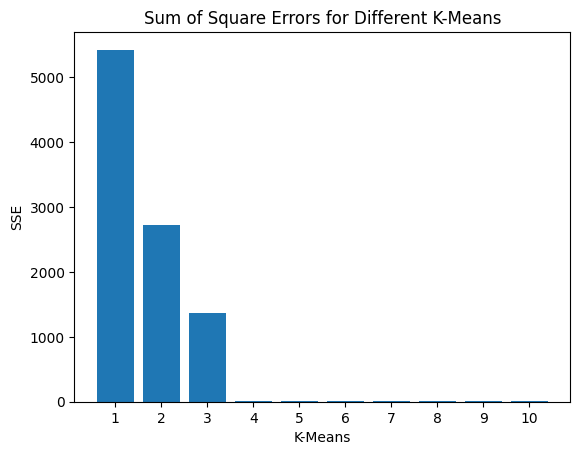

In [5]:
# (d) New Standard Deviation of 0.1
X, y = make_blobs(n_samples=300, centers=centers, cluster_std=0.1, random_state=None)
exec_KMeans(X, y, None)

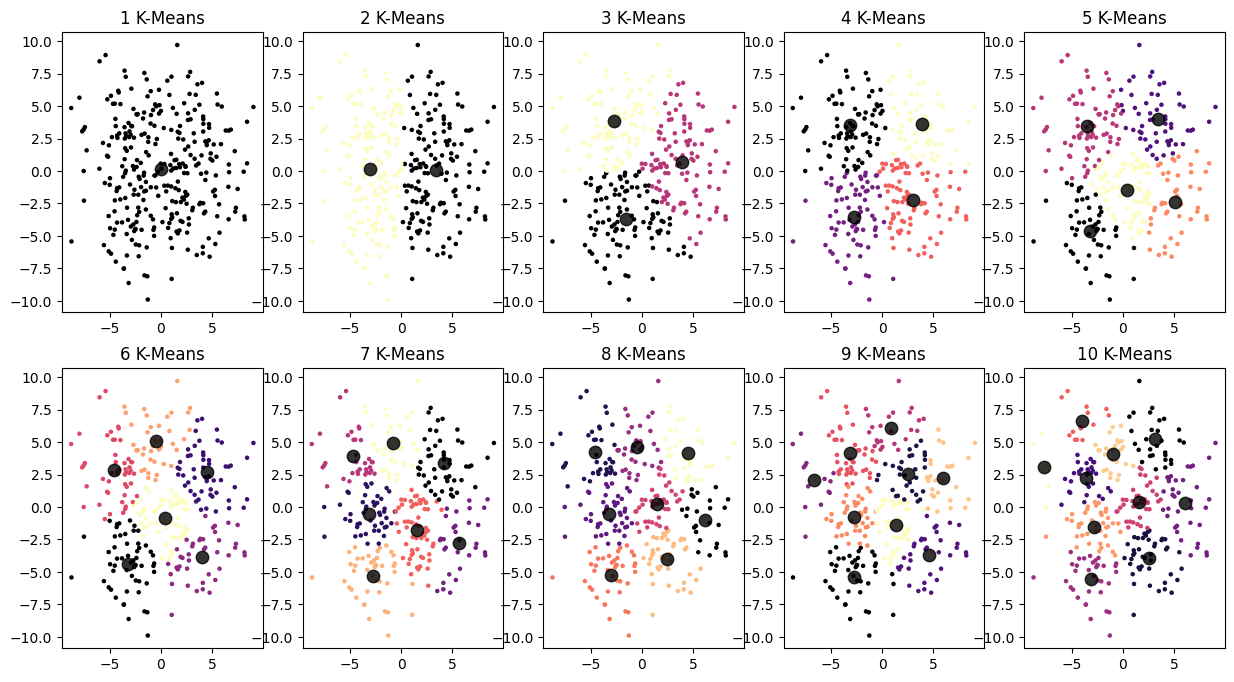

Contingency Matrix for k = 1
[[75]
 [75]
 [75]
 [75]]
---
Contingency Matrix for k = 2
[[ 9 66]
 [64 11]
 [ 7 68]
 [64 11]]
---
Contingency Matrix for k = 3
[[62  3 10]
 [32 42  1]
 [ 8  5 62]
 [ 1 57 17]]
---
Contingency Matrix for k = 4
[[10 56  9  0]
 [ 1 10 60  4]
 [60  8  4  3]
 [10  1 12 52]]
---
Contingency Matrix for k = 5
[[41  0  8  0 26]
 [ 7  3  1 31 33]
 [ 4  5 60  0  6]
 [ 0 48  7 13  7]]
---
Contingency Matrix for k = 6
[[47  0  3  6  2 17]
 [ 5  5 37  1  0 27]
 [ 3  1  0 42 22  7]
 [ 0 48  2  1 17  7]]
---
Contingency Matrix for k = 7
[[ 0 26  0  1 10 36  2]
 [ 3  3 25  1 37  6  0]
 [ 1 16  0 31  4  1 22]
 [46  1  6  1  8  0 13]]
---
Contingency Matrix for k = 8
[[ 0  1 25  2  4 36  7  0]
 [14  1  3  0 16  4 34  3]
 [ 0 34 16 19  4  1  0  1]
 [11  2  1 14 16  0  1 30]]
---
Contingency Matrix for k = 9
[[35  0  0  3  0  3 24  0 10]
 [ 7  3 33  0  0  1  3  5 23]
 [ 1  3  0 11 10 35 12  0  3]
 [ 0 25  2  0 14  4  1 22  7]]
---
Contingency Matrix for k = 10
[[ 0  7  5  0 31

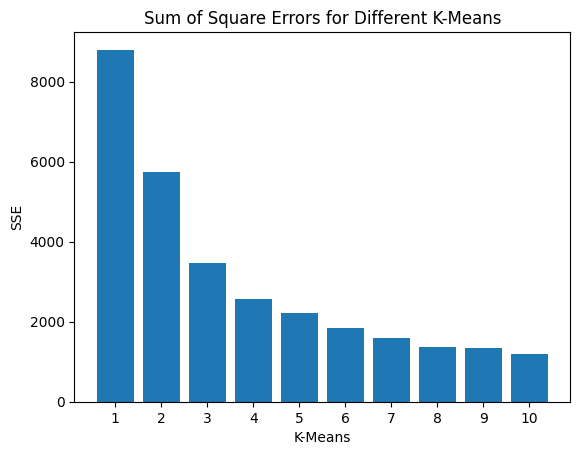

In [6]:
# (d) New Standard Deviation of 2.5
X, y = make_blobs(n_samples=300, centers=centers, cluster_std=2.5, random_state=None)
exec_KMeans(X, y, None)

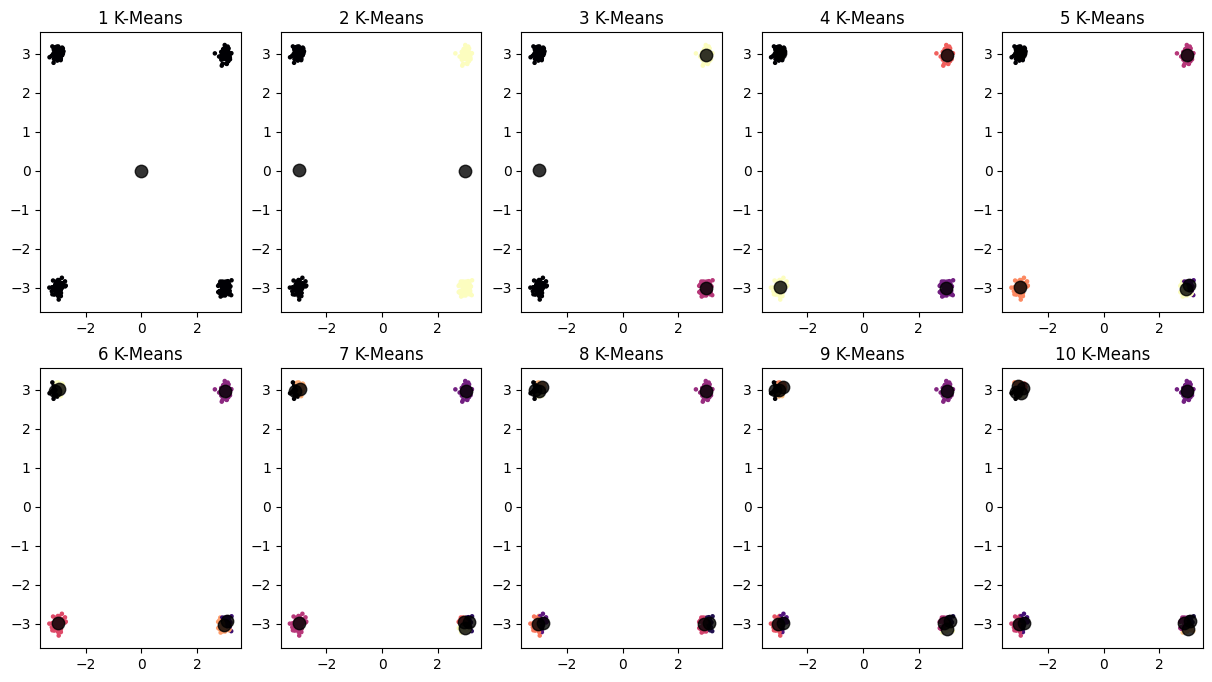

Contingency Matrix for k = 1
[[75]
 [75]
 [75]
 [75]]
---
Contingency Matrix for k = 2
[[75  0]
 [ 0 75]
 [75  0]
 [ 0 75]]
---
Contingency Matrix for k = 3
[[75  0  0]
 [ 0 75  0]
 [75  0  0]
 [ 0  0 75]]
---
Contingency Matrix for k = 4
[[ 0  0  0 75]
 [ 0 75  0  0]
 [75  0  0  0]
 [ 0  0 75  0]]
---
Contingency Matrix for k = 5
[[ 0  0  0 75  0]
 [ 0 30  0  0 45]
 [75  0  0  0  0]
 [ 0  0 75  0  0]]
---
Contingency Matrix for k = 6
[[ 0  0  0 75  0  0]
 [ 0 30  0  0 45  0]
 [22  0  0  0  0 53]
 [ 0  0 75  0  0  0]]
---
Contingency Matrix for k = 7
[[ 0  0  0 75  0  0  0]
 [ 0 22  0  0 30  0 23]
 [22  0  0  0  0 53  0]
 [ 0  0 75  0  0  0  0]]
---
Contingency Matrix for k = 8
[[ 0  0 22  0  0 53  0  0]
 [ 0 25  0  0 50  0  0  0]
 [19  0  0  0  0  0 22 34]
 [ 0  0  0 75  0  0  0  0]]
---
Contingency Matrix for k = 9
[[ 0  0 22  0  0 53  0  0  0]
 [ 0 18  0  0 37  0  0  0 20]
 [16  0  0  0  0  0 22 37  0]
 [ 0  0  0 75  0  0  0  0  0]]
---
Contingency Matrix for k = 10
[[ 0  0 22  0  0

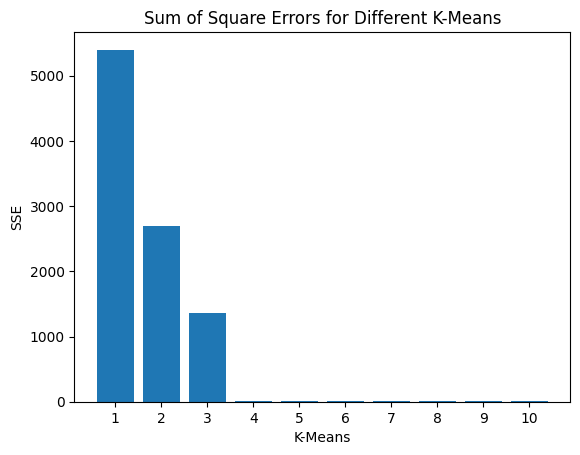

In [7]:
# (e) - Standard Deviation of 0.1
X, y = make_blobs(n_samples=300, centers=centers, cluster_std=0.1, random_state=None)
exec_KMeans(X, y, 42)

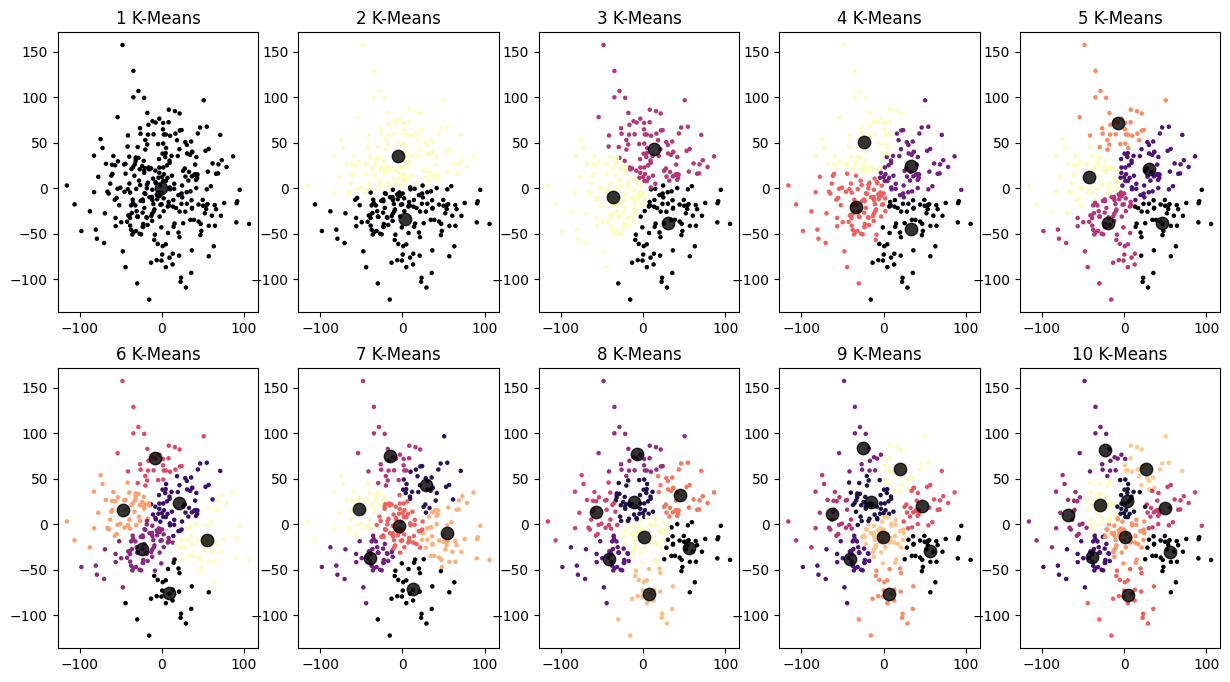

Contingency Matrix for k = 1
[[75]
 [75]
 [75]
 [75]]
---
Contingency Matrix for k = 2
[[35 40]
 [41 34]
 [32 43]
 [45 30]]
---
Contingency Matrix for k = 3
[[20 31 24]
 [25 22 28]
 [13 30 32]
 [25 18 32]]
---
Contingency Matrix for k = 4
[[18 20 20 17]
 [18 15 24 18]
 [ 9 20 26 20]
 [20 16 29 10]]
---
Contingency Matrix for k = 5
[[13 18 20 14 10]
 [12 15 21  9 18]
 [ 8 22 17  9 19]
 [14 16 23  5 17]]
---
Contingency Matrix for k = 6
[[ 8 19 17 12  8 11]
 [ 6 14 18  9 14 14]
 [ 4 22 17  9 15  8]
 [ 9 10 22  5 14 15]]
---
Contingency Matrix for k = 7
[[ 9 14 10 10 13 12  7]
 [ 8  5  8  7 20 15 12]
 [ 3 11 13  8 18  9 13]
 [11  6 11  4 19 15  9]]
---
Contingency Matrix for k = 8
[[ 9 10  8 11  6 13  6 12]
 [10 14  8  5 11  5  7 15]
 [ 6 15 12  9 10 10  3 10]
 [12  6 11  5  7 10  8 16]]
---
Contingency Matrix for k = 9
[[ 9 10  8  8  5  8  6 12  9]
 [ 9 15  8  3  9  6  7 14  4]
 [ 5 14 12  3  9  9  3 11  9]
 [10  9 10  2  6 11  8 15  4]]
---
Contingency Matrix for k = 10
[[ 9  7 10  8  4

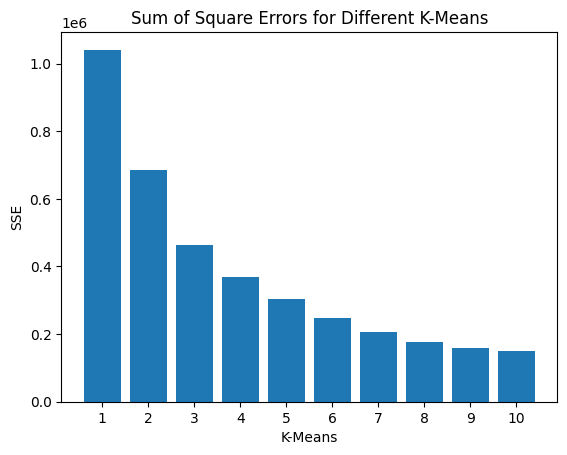

In [8]:
# (e) - Standard Deviation of 2.5
X, y = make_blobs(n_samples=300, centers=centers, cluster_std=42, random_state=None)
exec_KMeans(X, y, 42)

## Assignment 2

In [9]:
# Load data
X = pd.read_csv('vertebrate.csv')
print(X.head(20))

# Remove non-numeric columns
y = X['Class'].tolist()
names = X['Name'].tolist()
X = X.drop(columns=['Name', 'Class'])

             Name  Warm-blooded  Gives Birth  Aquatic Creature  \
0           human             1            1                 0   
1          python             0            0                 0   
2          salmon             0            0                 1   
3           whale             1            1                 1   
4            frog             0            0                 1   
5          komodo             0            0                 0   
6             bat             1            1                 0   
7          pigeon             1            0                 0   
8             cat             1            1                 0   
9   leopard shark             0            1                 1   
10         turtle             0            0                 1   
11        penguin             1            0                 1   
12      porcupine             1            1                 0   
13            eel             0            0                 1   
14     sal

In [10]:
# Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
def hierarchical_clustering(link_type: str):
    labels = []
    for i in range(len(names)):
        labels.append(f'{y[i]} | {names[i]}')
    Z = linkage(X, link_type)
    plt.figure(figsize=(10, 5))
    dn = dendrogram(
            Z,
            orientation='left',
            labels=labels,
            distance_sort='descending',
            show_leaf_counts=False
          )

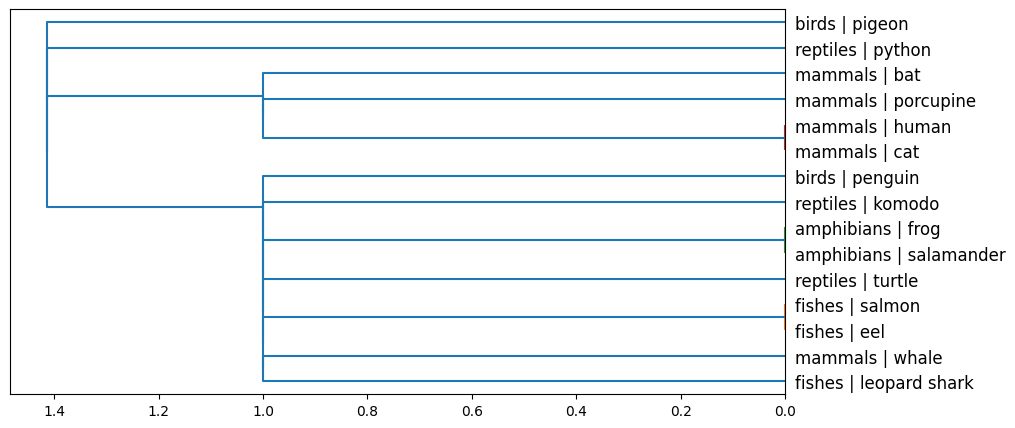

In [11]:
hierarchical_clustering('single')

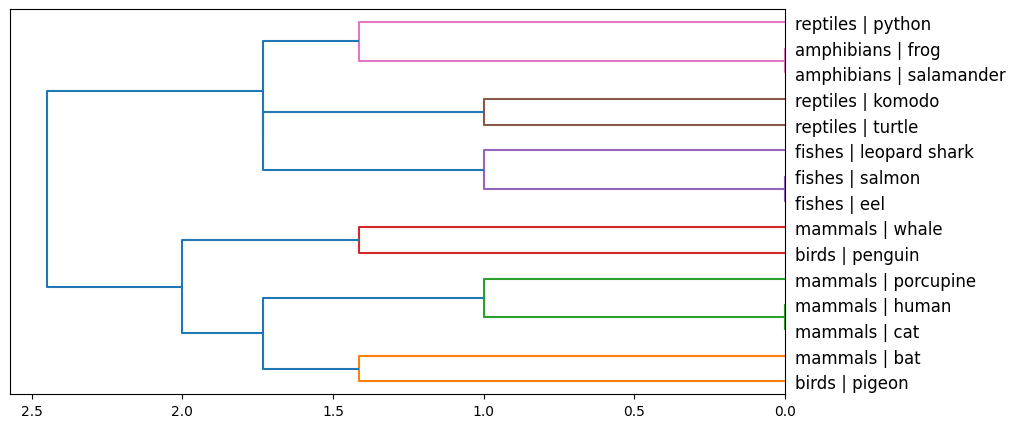

In [12]:
hierarchical_clustering('complete')

In [13]:
hierarchical_clustering('average')

## Assignment 3

In [14]:
# Load data
X = pd.read_csv('chameleon.csv')
#print(X.iloc[:, 0])
plt.figure(figsize=(10, 6))
plt.title('Chameleon Scatter Plot')
plt.xlabel('x-value')
plt.ylabel('y-value')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=5)

In [36]:
# (b)

def exec_DBSCAN(eps_value):
    db = DBSCAN(eps=eps_value, min_samples=5)
    db.fit(X)
    pred = db.fit_predict(X)
    
    plt.figure(figsize=(10, 6))
    plt.title(f'EPS = {eps_value} | Min Samples = 5')
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=pred, s=5, cmap='viridis')

In [37]:
exec_DBSCAN(15.5)

In [35]:
fig, axs = plt.subplots(5, 5, figsize=(20, 20))
fig.suptitle('Comparison of different EPS-values and min samples for DBSCAN', fontsize=26)

for i in range(5):
    for j in range(5):
        eps_value = (i * 5) + 1
        min_samples_value = (j * 5) + 1
        db = DBSCAN(eps=eps_value, min_samples=min_samples_value)
        db.fit(X)
        pred = db.fit_predict(X)
        plt.title(f'Scatter Plot (EPS = {eps_value})')
        axs[i, j].scatter(X.iloc[:, 0], X.iloc[:, 1], c=pred, s=5, cmap='viridis')
        axs[i, j].set_title(f'EPS = {eps_value} | Min Samples = {min_samples_value}')
